<a href="https://colab.research.google.com/github/ailab-nda/ML/blob/main/AI_test_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 講義室のマシンで実行する人は、最初にこれを実行して下さい（Google Colab の人は必要なし）。
!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org sklearn pydotplus

# 人工知能試験問題 2022

解答は本ノートに直接記述の上、学内メールにて提出すること。
（解答欄はクリックすると書き込めます）

## 1. Python 基礎知識

(1) 整数のリストを引数とし、その中の偶数のもののみからなるリストを返す関数 select_even を作成せよ。

In [ ]:
# 解答欄

def select_even(x):
    # 以下に処理を書く。


(2) a = [1, 4, 9, 16, 25, 36, 49, 64, 81, 100] に対し、作成した関数を適用せよ。

In [ ]:
# 解答欄

a = [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
# 作成した関数にaを入力して実行させる

[1, 9, 25, 49, 81]

(2) 着校日（2020年4月1日）から今日（2022年10月4日)まで何日経ったかを Python で計算せよ。

In [ ]:
# 解答欄

from datetime import date
date1 = date(2020,4,1)
date2 = date(2022,10,4)
difference = # 日数の差を計算し、difference 変数に格納する。

print("経過日数：", difference)

経過日数： 916 days, 0:00:00


## 2. 機械学習の理論
数式の書き方はこちら→ https://qiita.com/namoshika/items/63db972bfd1030f8264a

(1) 特徴ベクトルを $\vec{x}$, クラスを $w_i$ ($i = 1, \cdots, c)$ としたとき、事後確率 $P(w_i|\vec{x})$ を事前確率 $P(w_i)$ と尤度 $P(\vec{x}|w_i)$ を用いて表せ。


解答欄：


(2) 最尤推定および最大事後確率推定を (1) の式を用いて表せ。

解答欄：

(3) コロナの感染者の割合は、0.2% である。抗原検査をすると、コロナに罹患してる者のうち、99% が陽性反応を示す。しかし、罹患していない者でも、3% は陽性反応を示してしまう。さて、Aさんが抗原検査を受けたところ陽性反応が出た。Aさんが実際にコロナに罹っている確率はいくつか？

解答欄：


## 3. 機械学習実践

ある遭難した船に乗っていた乗客の生死を、まとめたデータがある(titanic.csv)。
データの各欄には以下の属性が含まれている。

- Survived: 　　生存結果 (1: 生存, 2: 死亡)　
- Pclass: 　　　乗客の階級 1が一番位が高い
- Name: 　　 　乗客の名前
- Sex: 　　　　 性別
- Age: 　　　　 年齢
- SibSp: 　　 　 兄弟、配偶者の数。
- Parch: 　　　　両親、子供の数。
- Ticket: 　　　 チケット番号。
- Fare: 　　　　 乗船料金。
- Cabin: 　　　　部屋番号
- Embarked: 　　 乗船した港（Cherbourg、Queenstown、Southamptonの３種類）

titanic.csv をデータフレームとして読み込み、df と名付ける。

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ailab-nda/ML/main/titanic.csv'
df = pd.read_csv(url) # <--- colab用
#df = pd.read_csv("titanic.csv") <--- 講義室の人用
df

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,0,3,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C
1305,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,0,3,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C
1307,0,3,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C


このデータには欠損値があるため、欠損値を確認してみる。

In [ ]:
df.isnull().sum()

survived       0
pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

欠損値があるとアルゴリズムがうまく働かないので補完する。

In [ ]:
# age と embarked の欠損値の補完
df["age"] = df["age"].fillna(df["age"].median())
df["embarked"] = df["embarked"].fillna("S")
df["fare"] = df["fare"].fillna(df["fare"].median())

(1) 欠損値の埋め方にはどのようなものがあるか、列挙して説明せよ。また、上記ではどのような手法で欠損値を埋めているか説明せよ。

解答欄：


再度確認すると欠損値はなくなっている。（注：cabin は空欄が多すぎるので今回は使用しない）

In [ ]:
df.isnull().sum()

survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin       1014
embarked       0
dtype: int64

また、文字があるとうまく動かないアルゴリズムがあるので数値に直す。

In [ ]:
df["sex"] = df["sex"].map({"male":0, "female":1})
df["embarked"] = df["embarked"].map({"S":0, "C":1, "Q":2})
df["fare"] = df["fare"].astype("int64")

データフレームがどうなったか確認する。

In [ ]:
df

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.00,0,0,24160,211,B5,0
1,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,151,C22 C26,0
2,0,1,"Allison, Miss. Helen Loraine",1,2.00,1,2,113781,151,C22 C26,0
3,0,1,"Allison, Mr. Hudson Joshua Creighton",0,30.00,1,2,113781,151,C22 C26,0
4,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.00,1,2,113781,151,C22 C26,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,0,3,"Zabour, Miss. Hileni",1,14.50,1,0,2665,14,NaN,1
1305,0,3,"Zabour, Miss. Thamine",1,28.00,1,0,2665,14,NaN,1
1306,0,3,"Zakarian, Mr. Mapriededer",0,26.50,0,0,2656,7,NaN,1
1307,0,3,"Zakarian, Mr. Ortin",0,27.00,0,0,2670,7,NaN,1


データを X, y に分割せよ。ただし、X = (年齢, 乗客の階級, 乗船地)、y = 生死　とする。

In [ ]:
# 解答欄

X = # df から　"age", "pclass", "embarked" の列を抽出
y = # df から "survived" の列を抽出

(2) RandomForestClassifier による分類性能を、10分割交差検証により評価せよ。学習器を clf とすること。

In [ ]:
#　解答欄

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

clf = # 学習器を設定する

scores = # 交差検証の実施：cross_val_score 関数
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.58 (+/- 0.18)


(3) SVM による分類性能を、10分割交差検証により評価せよ。

In [ ]:
from sklearn import svm
clf = # 学習器を SVM に設定
scores = # 交差検証の実施：cross_val_score 関数
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.68 (+/- 0.26)


(4) X に性別を追加したら結果（正解率）はどうなるか？

In [ ]:
# 解答欄
#入力は、年齢、階級、乗船地、性別としてください。
X = #入力の再設定
scores = cross_val_score(clf, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.78 (+/- 0.11)


(5) Xにその他の要素を入れたら結果（正解率）はどうなるか？

In [ ]:
# 解答欄
#入力の再々設定
scores = cross_val_score(clf, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.76 (+/- 0.13)


(6) 決定木による判断の可視化を以下に示す。生死の判断にもっとも効いている属性は何か？

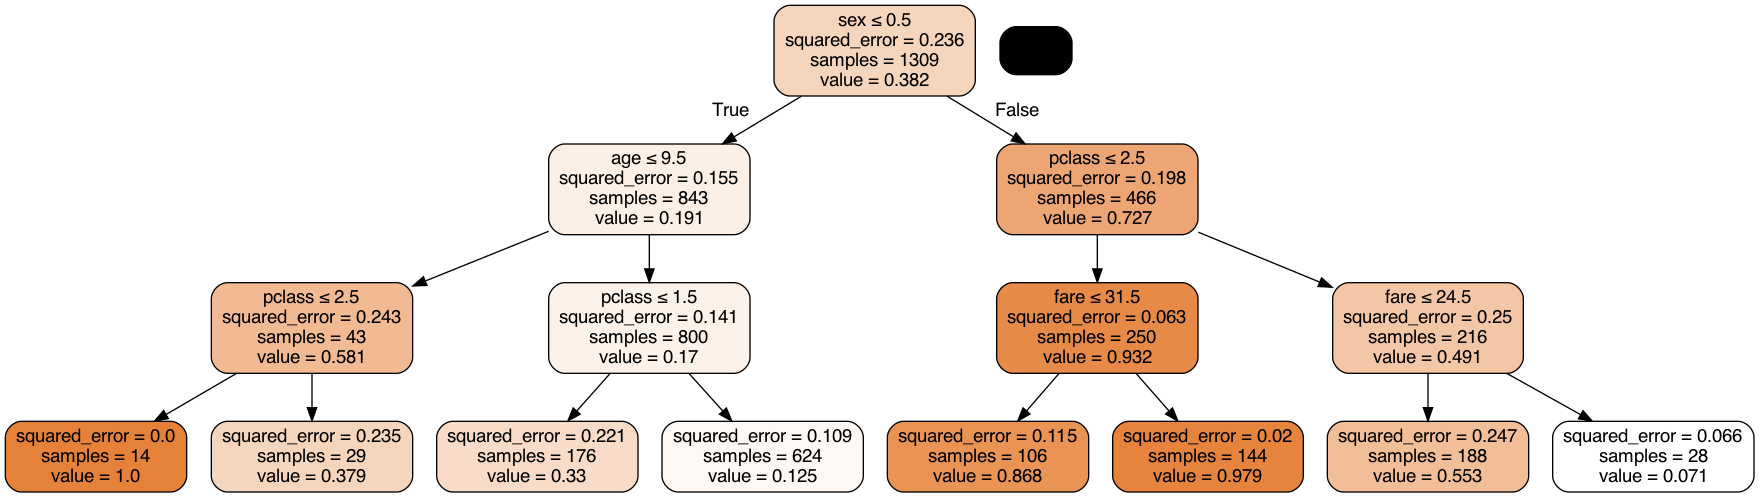

In [ ]:
from sklearn import tree
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

rt = tree.DecisionTreeRegressor(max_depth = 3)
rt.fit(X, y)

dot_data = export_graphviz(rt, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) 

解答欄：

# 4. 自由記述
・どうしてもこの科目を取らないといけない理由 <br>
・授業の感想・要望 <br>
など

解答欄：